# Architectual Reconstruction group whatever

## ROOT

## Data gathering

In [1]:
# change to point to the right folder on your mahchine where you cloned the Zeeguu-Core
CODE_ROOT_FOLDER = '/Users/egh/Zeeguu-Core/zeeguu_core/'

# And a helper function to construct
# the full path of a file by adding the CODE_ROOT_FOLDER

def full_path(file_name):
    return CODE_ROOT_FOLDER+file_name

In [2]:
import sys
import pathlib
from pathlib import Path
import re
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def LOC(file):
    return sum([1 for line in open(file)])

### List modules, sorted by lines of code in descending order

In [4]:
# find loc in each folder
import os

directory_contents = os.listdir(CODE_ROOT_FOLDER);

dirs_and_LOCs = []

for dir in directory_contents:
    inc = 0;
    for file in Path(CODE_ROOT_FOLDER + "/" + dir).rglob("*.py"):
        inc += LOC(str(file))

    dirs_and_LOCs.append(
        ((inc), str(dir)))

dirs_and_LOCs.sort(key = lambda x: -x[0])
for each in dirs_and_LOCs:
    print (str(each[0]) + " " + str(each [1]))

5582 model
1097 language
985 word_scheduling
341 content_recommender
311 content_retriever
192 util
161 bookmark_quality
87 emailer
65 configuration
20 definition_of_learned
0 constants.py
0 __init__.py
0 __pycache__


#### Showing us that `model`, `language` and `word_scheduling` are the 3 biggest packages measured in LOC

### DiGraph top level

In [5]:
CODE_ROOT_FOLDER = '/Users/egh/Zeeguu-Core/zeeguu_core/'

In [6]:
def extract_import_from_line(line):
    # TODO: think about how to detect imports when
    # they are inside a function / method
    #   x = re.search("^import (\S+)", line) 
    #   x = re.search("^from (\S+)", line) 
    x = re.search("^import zeeguu_core\.([a-z]+)", line) 
    x = re.search("^from zeeguu_core\.([a-z]+)", line) 
    
    #  if (x):
    #      print(str(x))
        
    return x.group(1)

In [7]:
def imports(file):
    # extracts all the imported modules from a file
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports

#assert "sqlalchemy" in imports(full_path('zeeguu_core/model/user.py'))

In [8]:
def module_from_file_path(folder_prefix, full_path):
    # extracting a module from a file name
    # e.g. /Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py -> zeeguu_core.model.user
    
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path(CODE_ROOT_FOLDER, full_path)

assert 'zeeguu_core.model.user' == module(full_path('zeeguu_core/model/user.py'))

In [9]:
def dependencies_graph():
    files = Path(CODE_ROOT_FOLDER).rglob("*.py")

    G = nx.Graph()

    for file in files:
        m = module(str(file))
        if m not in G.nodes:
            G.add_node(m)

        for each in imports(str(file)):
            G.add_edge(m, each)

    return G

## Basic Abstraction

### Aggregating Dependencies


In [10]:
def top_level_module(module_name, depth=1):
    # extracts the parent of depth X 
    # e.g. top_level_module(zeeguu_core.model.util, 1) -> zeeguu_core
    components = module_name.split(".")
    return ".".join(components[:depth])

assert (top_level_module("zeeguu_core.model.util") == "zeeguu_core")
assert (top_level_module("zeeguu_core.model.util", 2) == "zeeguu_core.model")

In [11]:
def abstracted_to_top_level(G):
    aG = nx.Graph()
    for each in G.edges():
        aG.add_edge(top_level_module(each[0]),
                    top_level_module(each[1]))
    return aG

In [12]:
def draw_graph_with_labels(G, figsize=(10,10)):
    plt.figure(figsize=figsize)
    nx.draw(G,with_labels=True, font_size=30)
    plt.show()

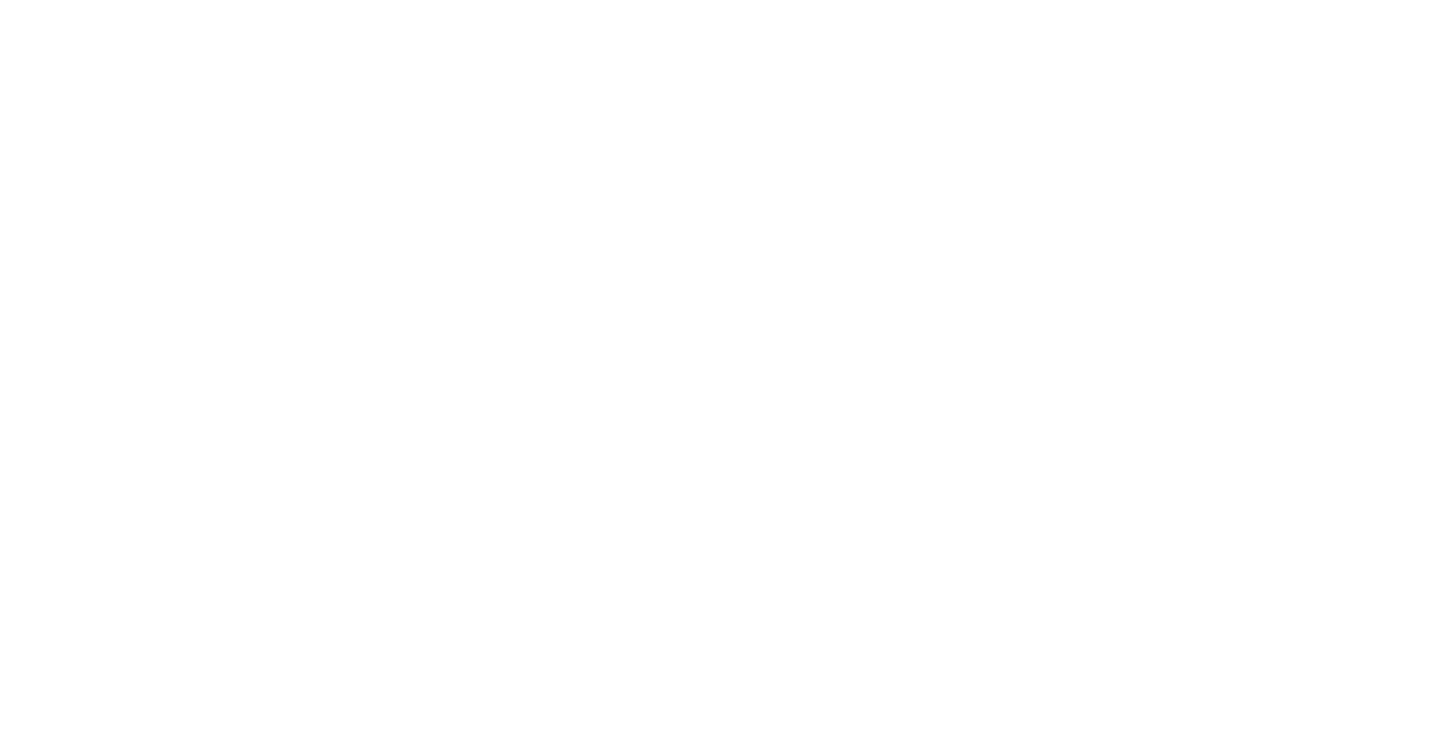

In [27]:
G = dependencies_graph()
aG = abstracted_to_top_level(G)
draw_graph_with_labels(aG, (20,10))

#### But no arrows :sad:

In [14]:
def draw_digraph(G, figsize=(10,10)):
    aG = nx.DiGraph()
    for each in G.edges():
        source = top_level_module(each[0])
        destination = top_level_module(each[1])
        #print(source + " " + destination)
        aG.add_edge(source, destination)
            
    plt.figure(figsize=figsize)
    nx.draw(aG,with_labels=True, font_size=20, arrowsize=30)
    plt.show()

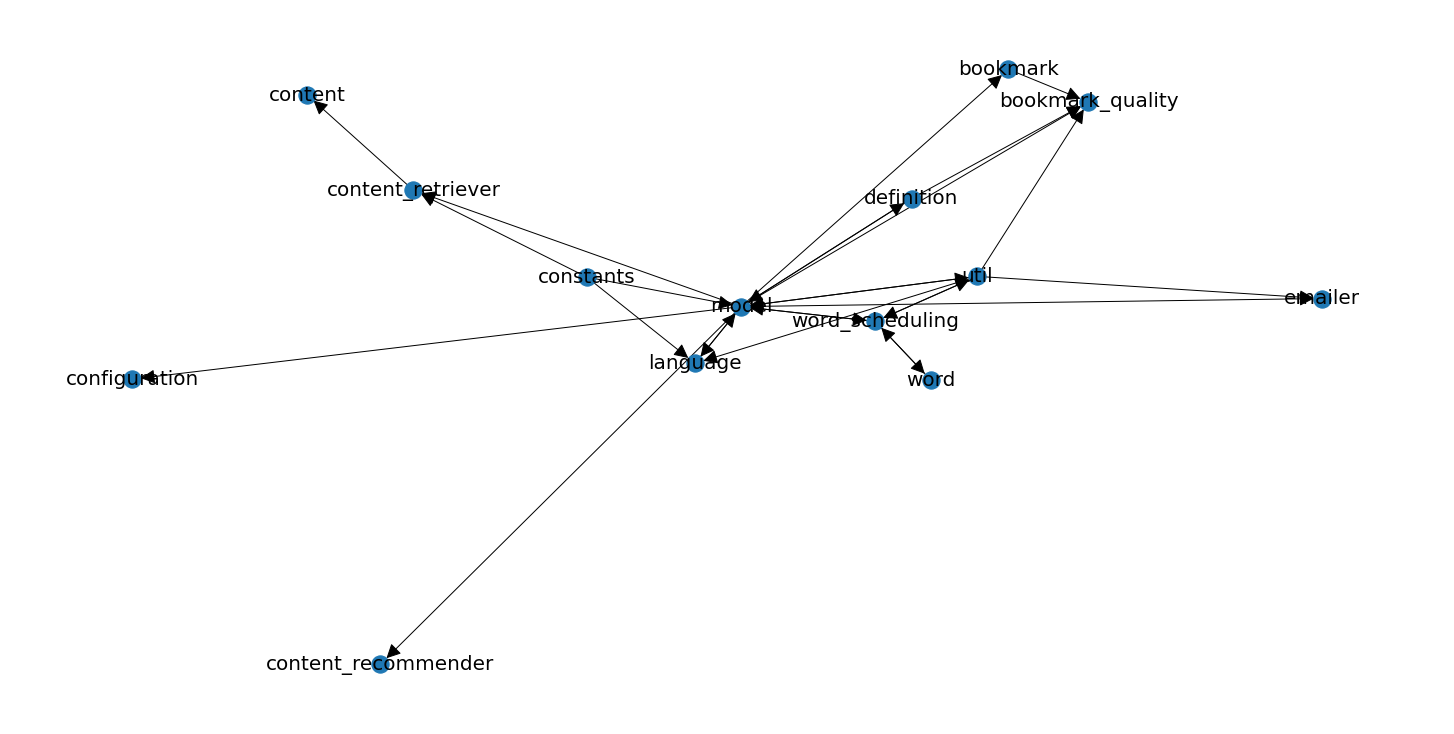

In [15]:
dG = dependencies_graph()
draw_digraph(dG, (20,10))

## MODEL:

### Draw dependency graph from imports for each of the 3 packages

In [16]:
SUFFIX = 'content_recommender'
CODE_ROOT_FOLDER = '/Users/egh/Zeeguu-Core/zeeguu_core/' + SUFFIX + '/'

In [17]:
def extract_import_from_line(line):
    # TODO: think about how to detect imports when
    # they are inside a function / method
    #   x = re.search("^import (\S+)", line) 
    #   x = re.search("^from (\S+)", line) 
    x = re.search("^import zeeguu_core\." + SUFFIX + "\.([a-z]+)", line) 
    x = re.search("^from zeeguu_core\." + SUFFIX + "\.([a-z]+)", line) 
    
    #  if (x):
    #      print(str(x))
        
    return x.group(1)

In [18]:
def imports(file):
    # extracts all the imported modules from a file
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports

#assert "sqlalchemy" in imports(full_path('zeeguu_core/model/user.py'))

In [19]:
def module_from_file_path(folder_prefix, full_path):
    # extracting a module from a file name
    # e.g. /Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py -> zeeguu_core.model.user
    
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path(CODE_ROOT_FOLDER, full_path)

assert 'zeeguu_core.model.user' == module(full_path('zeeguu_core/model/user.py'))

In [20]:
def dependencies_graph():
    files = Path(CODE_ROOT_FOLDER).rglob("*.py")

    G = nx.Graph()

    for file in files:
        m = module(str(file))
        if m not in G.nodes:
            G.add_node(m)

        for each in imports(str(file)):
            G.add_edge(m, each)

    return G

##### Aggregated dependencies

In [21]:
def top_level_module(module_name, depth=1):
    # extracts the parent of depth X 
    # e.g. top_level_module(zeeguu_core.model.util, 1) -> zeeguu_core
    components = module_name.split(".")
    return ".".join(components[:depth])

assert (top_level_module("zeeguu_core.model.util") == "zeeguu_core")
assert (top_level_module("zeeguu_core.model.util", 2) == "zeeguu_core.model")

In [22]:
def abstracted_to_top_level(G):
    aG = nx.Graph()
    for each in G.edges():
        aG.add_edge(top_level_module(each[0]),
                    top_level_module(each[1]))
    return aG

In [23]:
def draw_graph_with_labels(G, figsize=(10,10)):
    plt.figure(figsize=figsize)
    nx.draw(G,with_labels=True, font_size=30)
    plt.show()

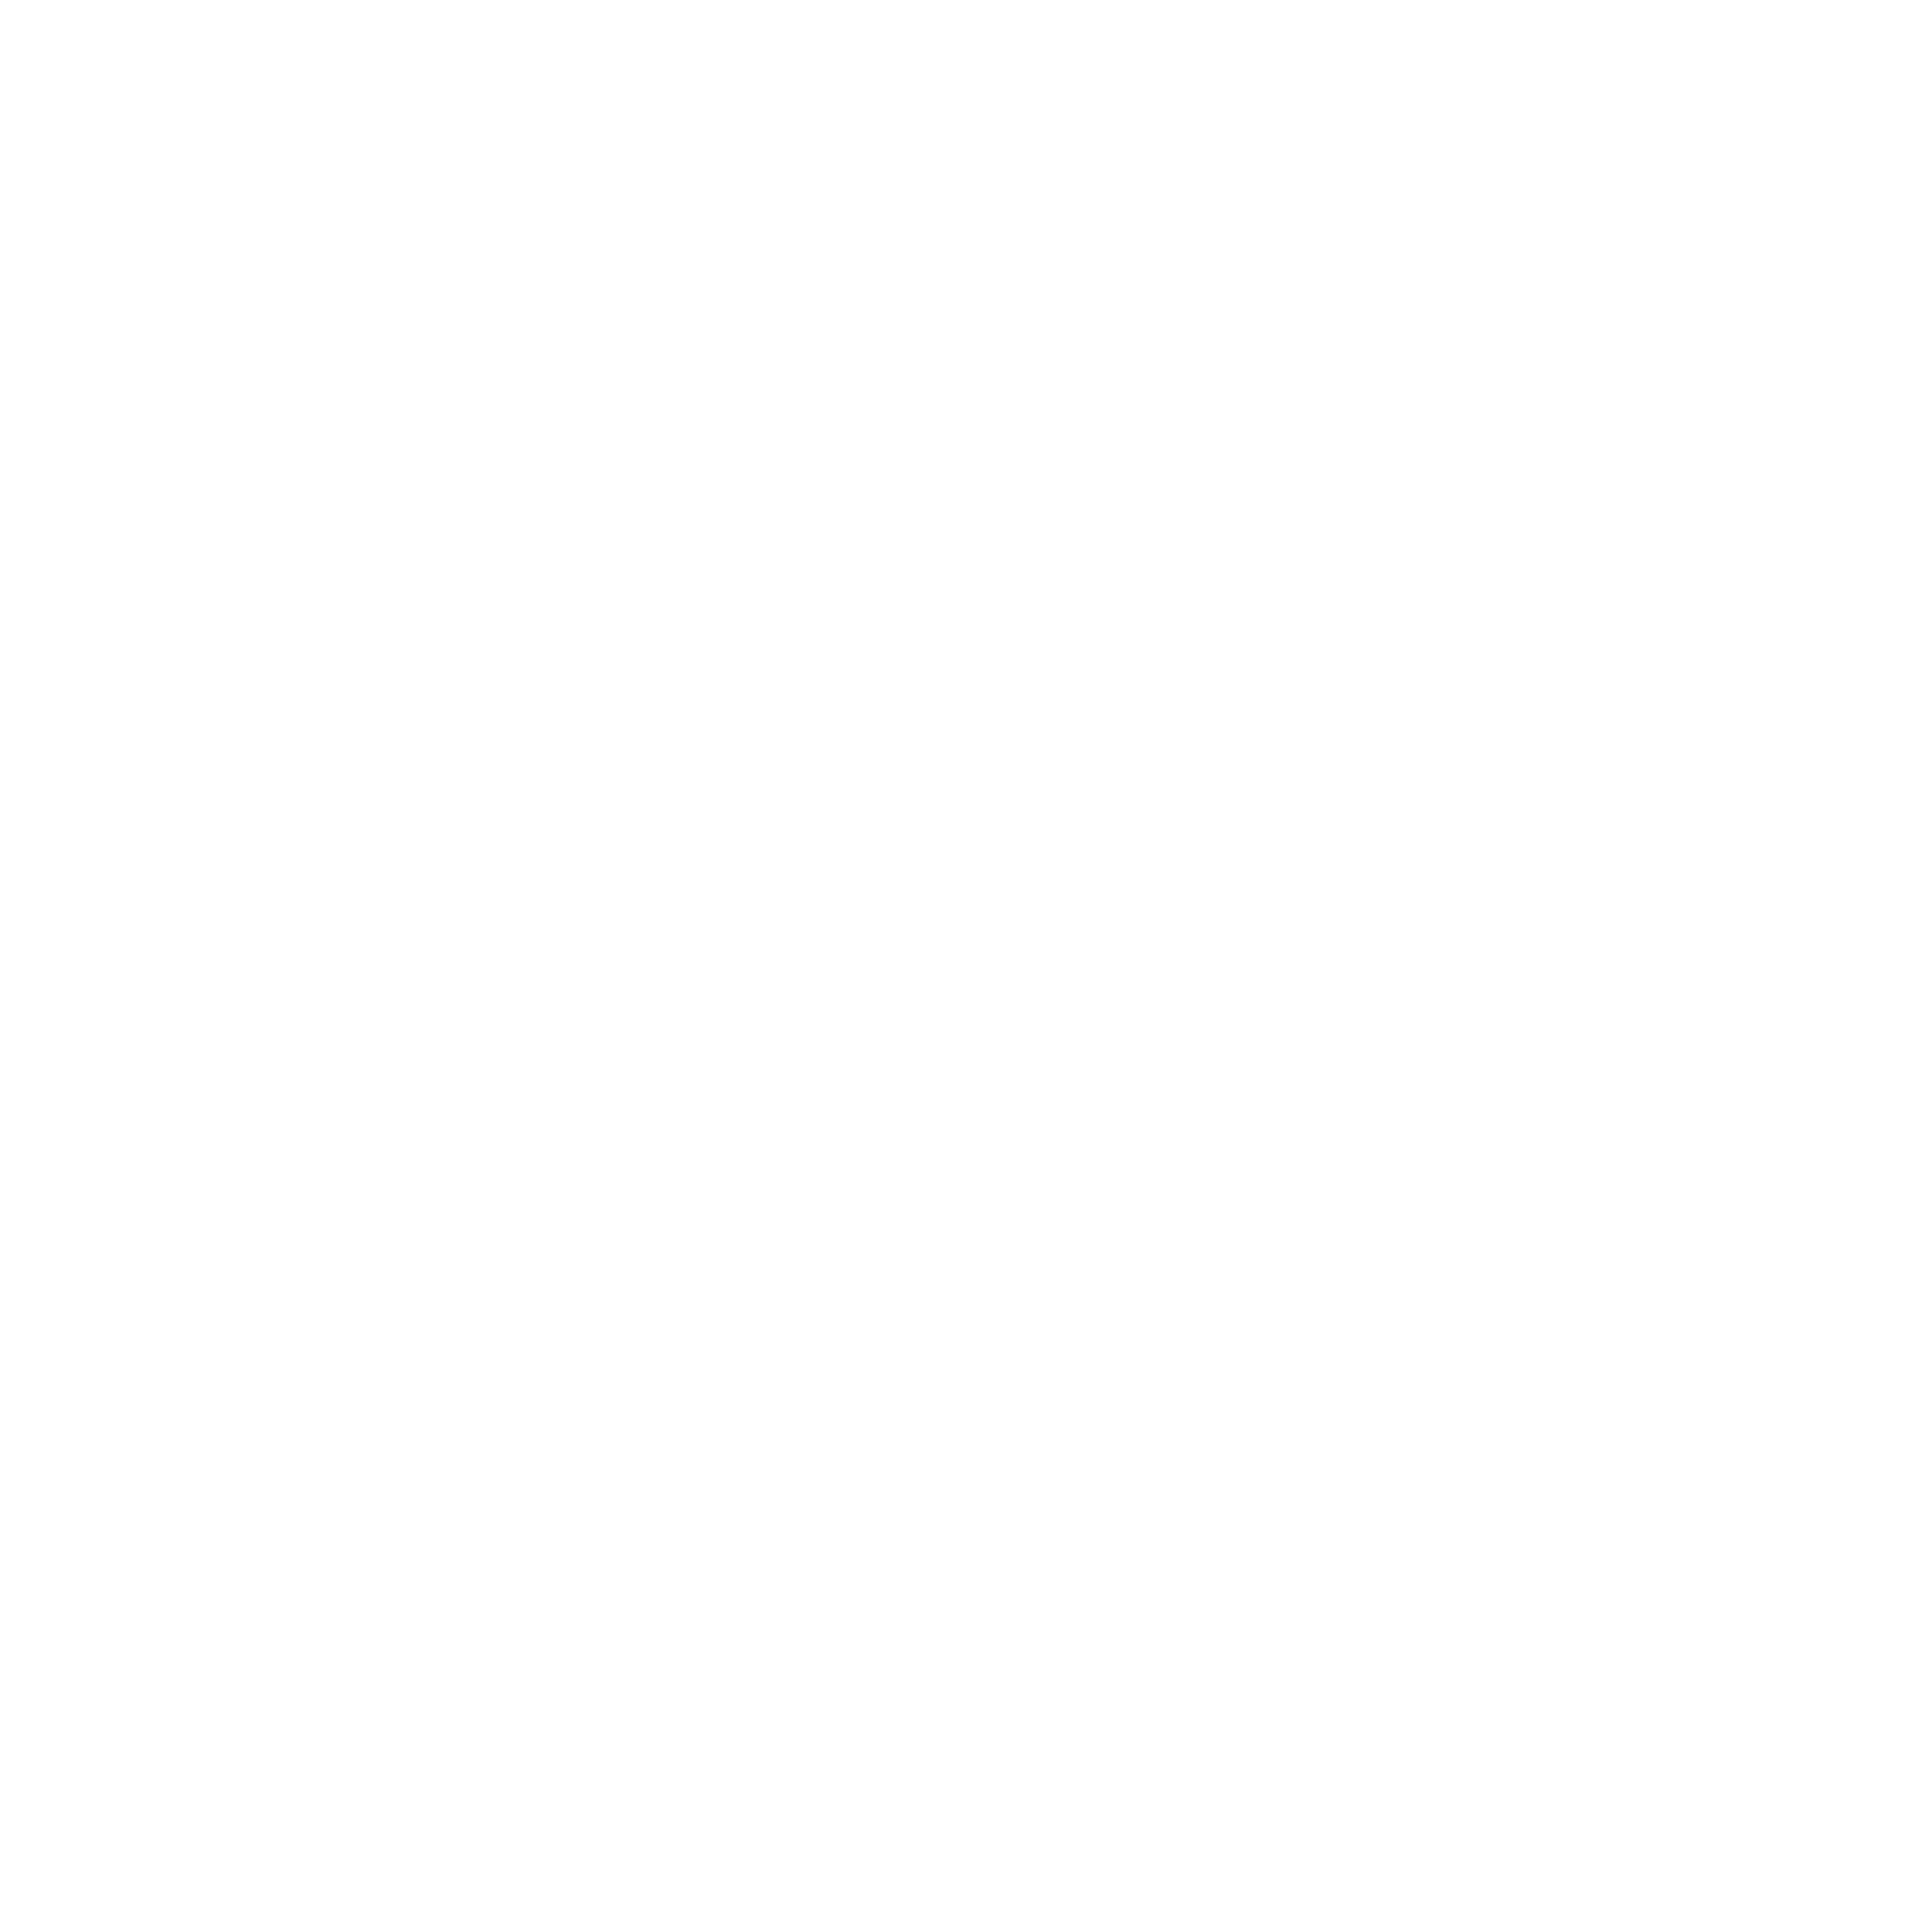

In [24]:
G = dependencies_graph()
aG = abstracted_to_top_level(G)
draw_graph_with_labels(aG, (30,30))

#### But no arrows :sad:

In [25]:
def draw_digraph(G, figsize=(10,10)):
    aG = nx.DiGraph()
    for each in G.edges():
        source = top_level_module(each[0])
        destination = top_level_module(each[1])
        #print(source + " " + destination)
        aG.add_edge(source, destination)
            
    plt.figure(figsize=figsize)
    nx.draw(aG,with_labels=True, font_size=20, arrowsize=30)
    plt.show()

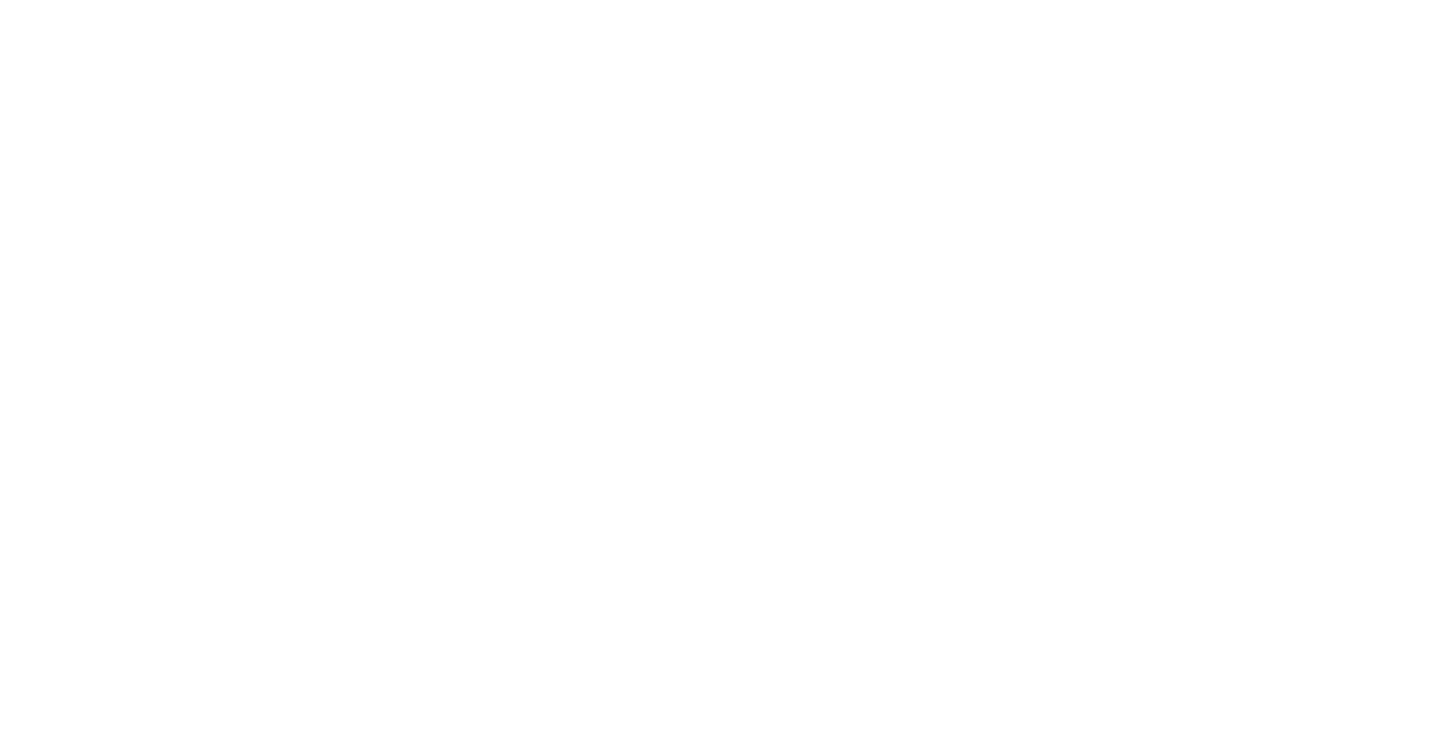

In [26]:
dG = dependencies_graph()
draw_digraph(dG, (20,10))